<a href="https://colab.research.google.com/github/agrisB/ColabFiles/blob/main/FROST_lvgmc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
dfx = pd.read_excel('/content/lvgmc_augsne_1.xls', sheet_name=2)
dfx[:1]
dfx.columns

Index(['Priekuļi, Aramkārtas temperatūra 20 cm dziļumā, faktiskā, °C',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [ ]:
df20 = pd.read_excel('/content/lvgmc_augsne_1.xls', sheet_name=2,skiprows=[0])

#convert if dtype not datetime
df20['Datums \ Laiks'] = pd.to_datetime(df20['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
# df20['Datums'] = pd.to_timedelta(df20['Datums'].dt.strftime('%Y-%m-%d'))

#create index from column Date
df20 = df20.set_index('Datums \ Laiks')
#convert all times to timedelta
df20.columns = pd.to_timedelta(df20.columns + ':00')
#reshape - columns to second level of index
df20 = df20.stack()
#Multindex to index
df20.index = df20.index.get_level_values(0) + df20.index.get_level_values(1)
#create column from index
df20 = df20.reset_index()
#get new column names
df20.columns = ['date','val']


In [ ]:
df = pd.read_excel('/content/lvgmc_augsne_1.xls', sheet_name=1,skiprows=[0])
# df = df.iloc[1:]
# df.rename(columns = {'Datums \ Laiks' : 'Datums'}, inplace = True)
df.columns

Index(['Datums \ Laiks', '00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
       '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00'],
      dtype='object')

In [ ]:
#convert if dtype not datetime
df['Datums \ Laiks'] = pd.to_datetime(df['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
# df['Datums'] = pd.to_timedelta(df['Datums'].dt.strftime('%Y-%m-%d'))

#create index from column Date
df = df.set_index('Datums \ Laiks')
#convert all times to timedelta
df.columns = pd.to_timedelta(df.columns + ':00')
#reshape - columns to second level of index
df = df.stack()
#Multindex to index
df.index = df.index.get_level_values(0) + df.index.get_level_values(1)
#create column from index
df = df.reset_index()
#get new column names
df.columns = ['date','val']

df

# https://stackoverflow.com/questions/41425326/pandas-combine-row-dates-with-column-times

date  val
0    2021-01-01 00:00:00  0.2
1    2021-01-01 01:00:00  0.2
2    2021-01-01 02:00:00  0.2
3    2021-01-01 03:00:00  0.2
4    2021-01-01 04:00:00  0.2
...                  ...  ...
2482 2021-04-14 21:00:00  5.6
2483 2021-04-14 22:00:00  5.0
2484 2021-04-14 23:00:00  3.8
2485 2021-04-15 00:00:00  3.5
2486 2021-04-15 01:00:00  3.4

[2487 rows x 2 columns]

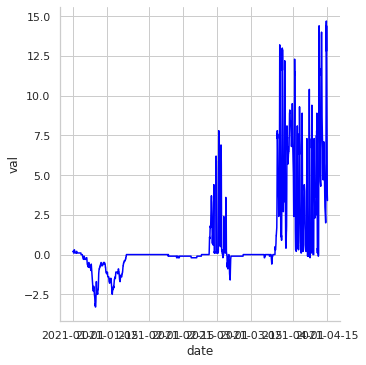

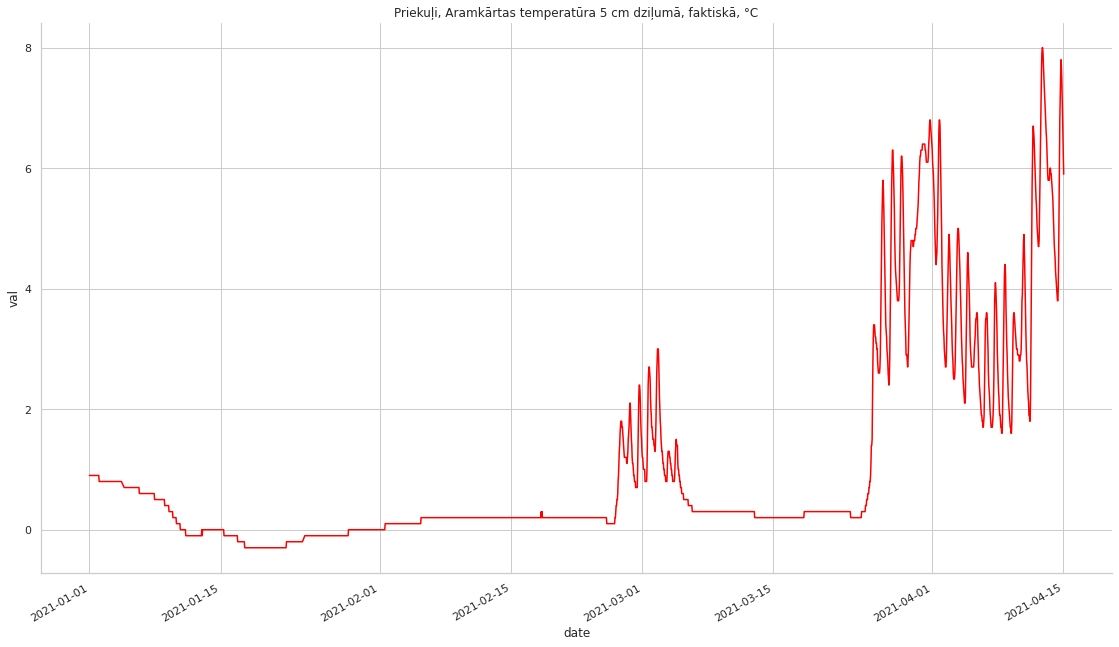

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
# sns.set(rc={'figure.figsize':(18,10)})
g = sns.relplot(x="date", y="val", kind="line", data=df, color="blue")
plt.title("Priekuļi, Aramkārtas temperatūra 5 cm dziļumā, faktiskā, °C")

g.fig.autofmt_xdate()
g.fig.set_size_inches(18, 10)
# g.fig.set_title("Priekuļi, Aramkārtas temperatūra 5 cm dziļumā, faktiskā, °C")



Text(0.5, 1.0, 'Priekuļi, Aramkārtas temperatūra 5 cm dziļumā, faktiskā, °C')

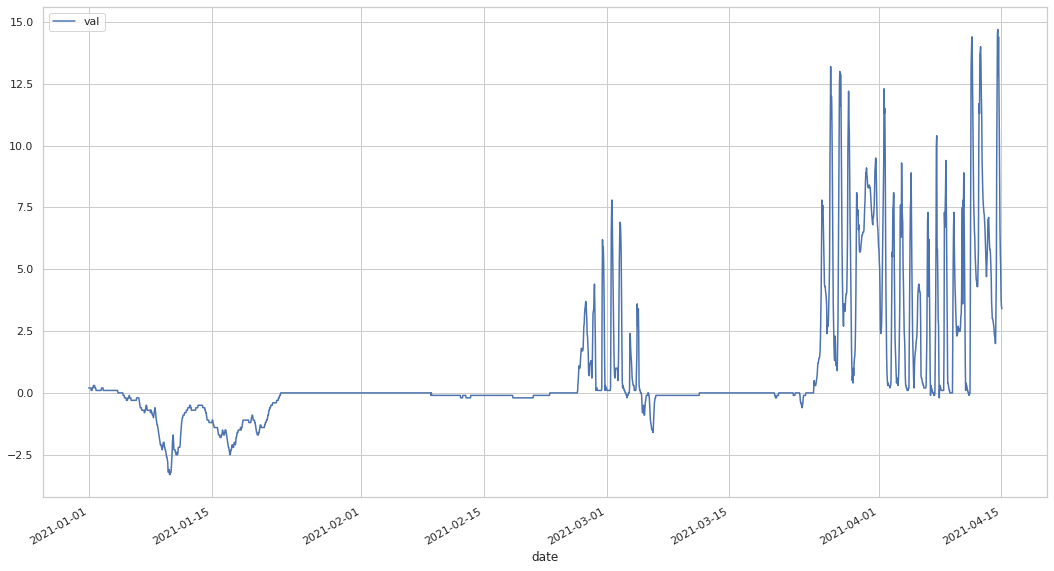

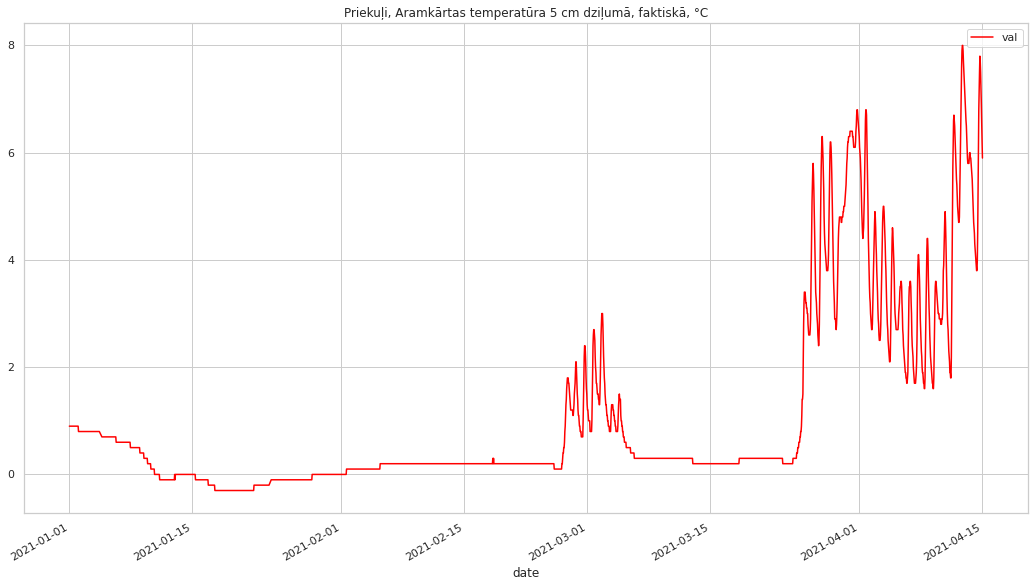

In [ ]:
import matplotlib

df['date']=pd.to_datetime(df['date'].astype(str), format='%Y-%m-%d %H:%M:%S', dayfirst=True)
df = df.sort_values(by='date')

lines = df.plot.line(x='date', y='val')
lines20 = df20.plot.line(x='date', y='val', color="red")

# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax.xaxis.set_major_formatter(myFmt)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)

plt.title("Priekuļi, Aramkārtas temperatūra 5 cm dziļumā, faktiskā, °C")

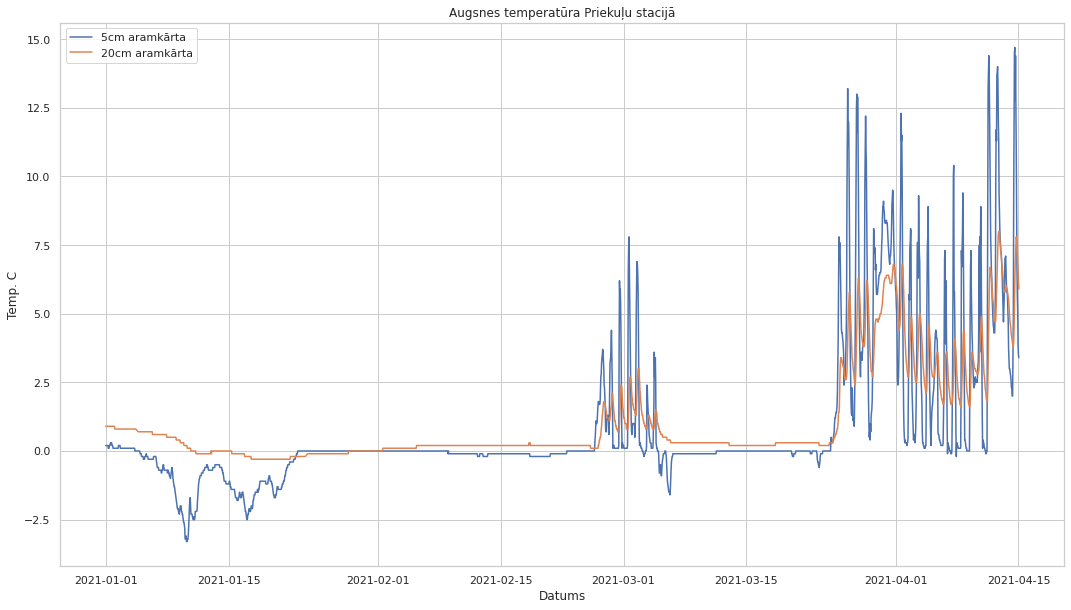

In [ ]:

# plotting the line 1 points 
plt.plot(df['date'], df['val'], label = "5cm aramkārta")
# line 2 points
x2 = df20['date']
y2 = df20['val']
# plotting the line 2 points 
plt.plot(x2, y2, label = "20cm aramkārta")
plt.xlabel('Datums')
# Set the y axis label of the current axis.
plt.ylabel('Temp. C')
# Set a title of the current axes.
plt.title('Augsnes temperatūra Priekuļu stacijā')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
#Onesoil

In [ ]:
dfos = pd.read_csv('/content/1206_2021_04_15T15_10_41.csv')
# dfos = dfos[dfos.coordinate_id.isin(2404)]
dfos = dfos.loc[dfos['coordinate_id'] == 2404]
# dfos.coordinate_id.isin(2404)
dfos

datetime  coordinate_id  ...  air_temp  dew_point
0     2021-04-15T04:10:28           2404  ...      0.40      -2.31
1     2021-04-15T03:40:29           2404  ...     -0.20      -2.57
2     2021-04-15T03:10:30           2404  ...     -0.20      -2.25
3     2021-04-15T02:40:31           2404  ...      0.50      -2.05
4     2021-04-15T02:10:32           2404  ...      1.55      -2.58
...                   ...            ...  ...       ...        ...
4392  2021-01-14T13:20:18           2404  ...      6.95     -13.58
4393  2021-01-14T12:50:19           2404  ...      5.70      -9.70
4394  2021-01-14T12:20:20           2404  ...      6.90     -18.34
4395  2021-01-14T11:50:21           2404  ...     12.00     -16.53
4397  2021-01-14T11:20:22           2404  ...     19.30      -4.56

[4397 rows x 13 columns]

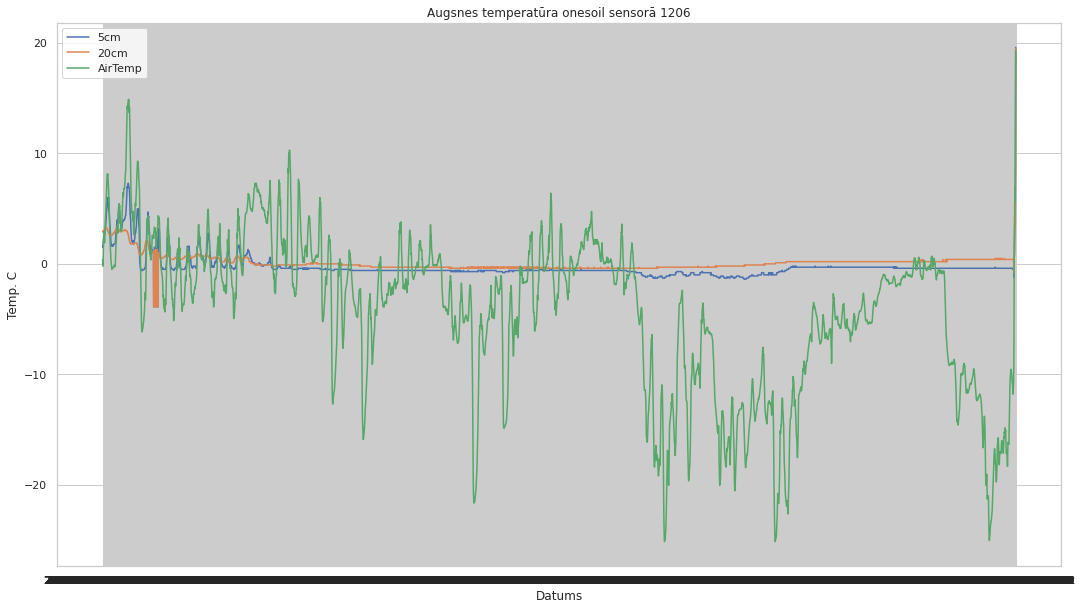

In [ ]:
# plotting the line 1 points 
plt.plot(dfos['datetime'], dfos['temp_5'], label = "5cm")
# line 2 points
x2 = dfos['datetime']
y2 = dfos['temp_20']
# plotting the line 2 points 
plt.plot(x2, y2, label = "20cm")
plt.plot(dfos['datetime'], dfos['air_temp'], label = "AirTemp")
plt.xlabel('Datums')
# Set the y axis label of the current axis.
plt.ylabel('Temp. C')
# Set a title of the current axes.
plt.title('Augsnes temperatūra onesoil sensorā 1206')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
# uni = dfos['coordinate_id'].unique()
# uni



array([2404, 1512])

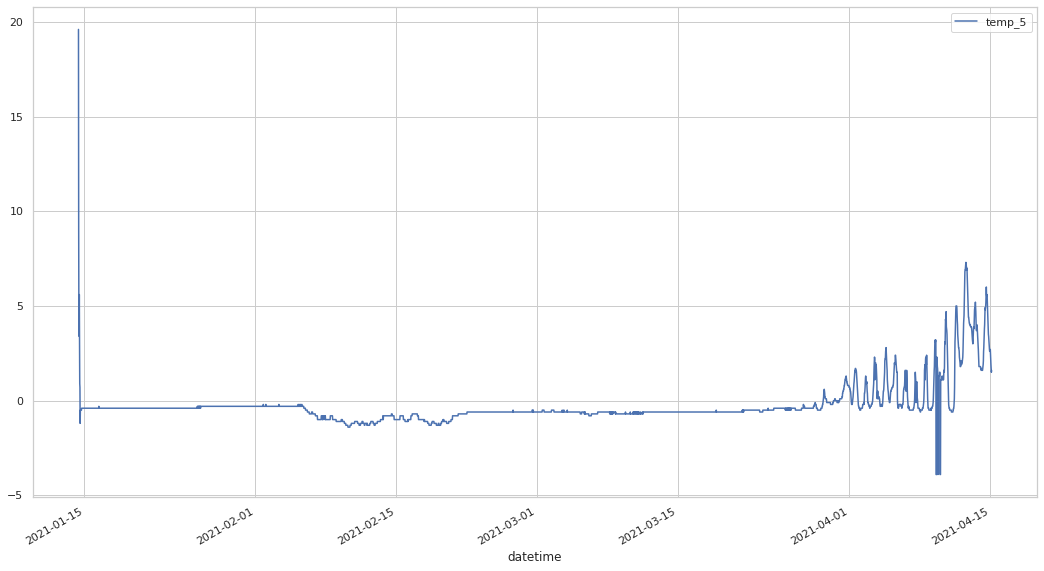

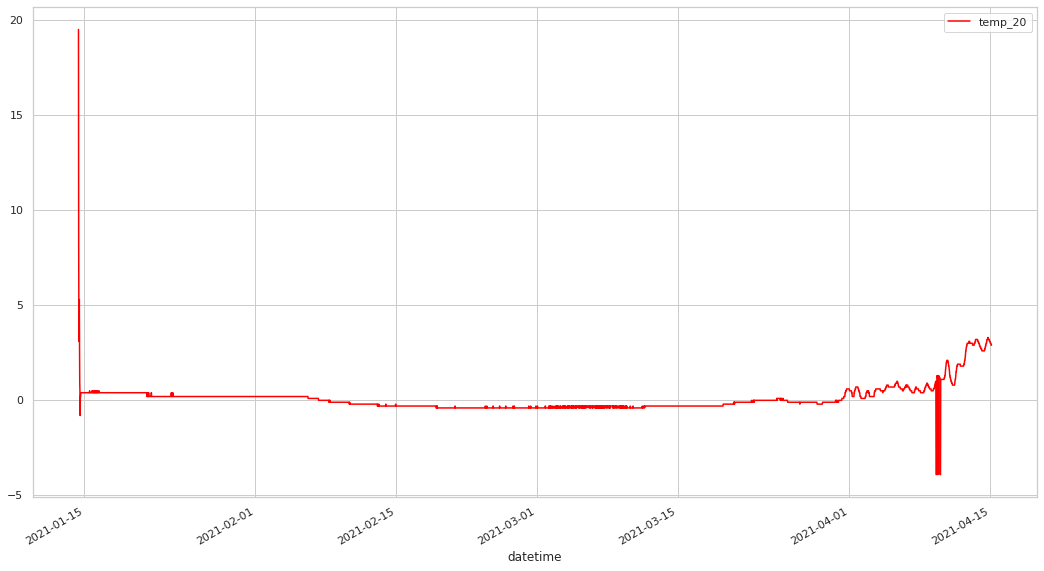

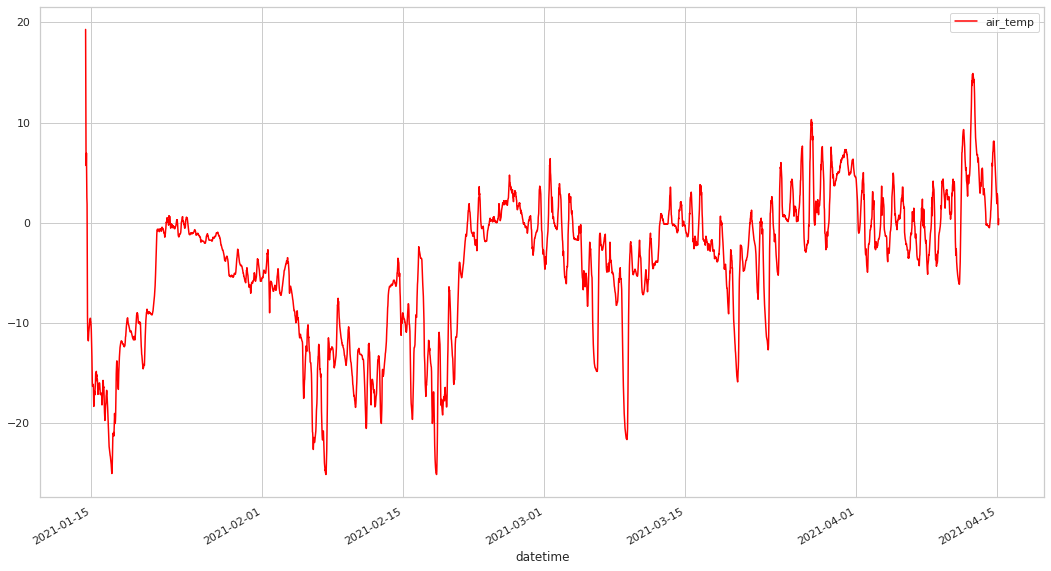

In [ ]:
dfos['datetime']=pd.to_datetime(dfos['datetime'])
dfos = dfos.sort_values(by='datetime')

dfos.plot.line(x='datetime', y='temp_5')
dfos.plot.line(x='datetime', y='temp_20', color="red")
dfos.plot.line(x='datetime', y='air_temp', color="red")

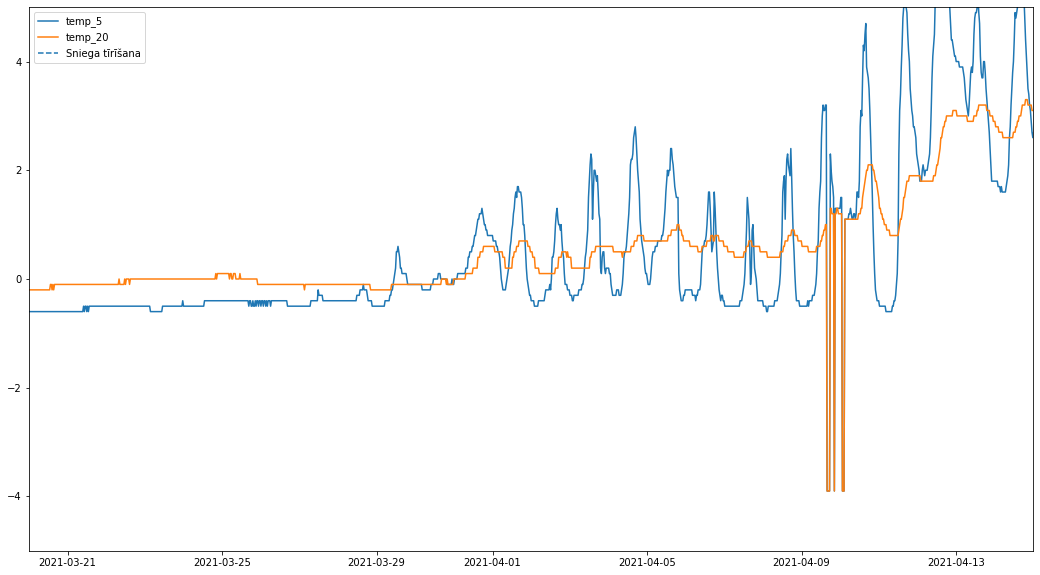

In [ ]:
dfos['datetime']=pd.to_datetime(dfos['datetime'])
dfos = dfos.sort_values(by='datetime')

# dfos.plot.line(x='datetime', y='temp_5')
# dfos.plot.line(x='datetime', y='temp_20', color="red")
# dfos.plot.line(x='datetime', y='air_temp', color="red")


plt.plot(dfos['datetime'], dfos['temp_5'], label = "temp_5")
plt.plot(dfos['datetime'], dfos['temp_20'], label = "temp_20")
# plt.plot(dfos['datetime'], dfos['air_temp'], label = "air_temp")
plt.xlim([datetime.date(2021, 3, 20), datetime.date(2021, 4, 15)])
plt.ylim(-5,5)
# plt.axvline(0.2, 0, 1, label='Sniega tīrīšana')
plt.axvline(datetime.date(2021, 2, 5), label='Sniega tīrīšana', linestyle = "--")
plt.rcParams["figure.figsize"] = (18,10)
# plt.tick_params(which='minor', length=4, color='r')
plt.legend()
plt.show()

In [ ]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 301kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

df = dfos
# fig = px.line(df, x="datetime", y="temp_5",template='plotly_white').add_trace(go.Scatter(x=df["datetime"], y=df["temp_20"], mode='lines', name='temp_20'))

# fig.show()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["datetime"], y=df["temp_5"], mode='lines', name='temp_5', line_color="blue"))

fig.add_trace(go.Scatter(x=df["datetime"], y=df["temp_20"], mode='lines', name='temp_20'))

fig.add_trace(go.Scatter(x=df["datetime"], y=df["air_temp"], mode='lines', name='air_temp'))

fig.add_vline(x=datetime.date(2021, 2, 5), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_vline(x=datetime.date(2021, 3, 4), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_vline(x=datetime.date(2021, 3, 19), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_hline(y = 0, line_width=1.5, line_dash="dash", line_color="blue", name='Nulle')

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Temperature, C°')
fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)

# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='markers', name='markers'))

fig.show()

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

dfm = dfos
# fig = px.line(dfm, x="datetime", y="temp_5",template='plotly_white').add_trace(go.Scatter(x=dfm["datetime"], y=dfm["temp_20"], mode='lines', name='temp_20'))

# fig.show()

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["moisture_5"], mode='lines', name='moisture_5', line_color="blue"))

fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["moisture_20"], mode='lines', name='moisture_20'))

# fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["air_temp"], mode='lines', name='air_temp'))

fig.add_vline(x=datetime.date(2021, 2, 5), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_vline(x=datetime.date(2021, 3, 4), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_vline(x=datetime.date(2021, 3, 19), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')


fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Moisture, %')
fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)

# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='markers', name='markers'))

fig.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px


dfg = pd.read_csv('/content/1539_2021_04_15T15_08_34.csv')
dfg = dfg.loc[dfg['coordinate_id'] == list(dfg['coordinate_id'].unique())[0]]

dfos = pd.read_csv('/content/1206_2021_04_15T15_10_41.csv')
# dfos = dfos.loc[dfos['coordinate_id'] == 2404]
dfos = dfos.loc[dfos['coordinate_id'] == list(dfos['coordinate_id'].unique())[0]]


df = dfg


# Create traces
fig = go.Figure()
# fig.add_trace(go.Scatter(x=df["datetime"], y=df["temp_5"], mode='lines', name='temp_5', line_color="blue"))

# fig.add_trace(go.Scatter(x=df["datetime"], y=df["temp_20"], mode='lines', name='temp_20'))

# fig.add_trace(go.Scatter(x=df["datetime"], y=df["air_temp"], mode='lines', name='air_temp'))

fig.add_trace(go.Scatter(x=df["datetime"], y=df["moisture_5"], mode='lines', name='moisture_5'))
fig.add_trace(go.Scatter(x=df["datetime"], y=df["moisture_20"], mode='lines', name='moisture_20'))
# fig.add_trace(go.Scatter(x=df["datetime"], y=df["air_temp"], mode='lines', name='air_temp'))

# fig.add_vline(x=datetime.date(2021, 2, 5), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
# fig.add_vline(x=datetime.date(2021, 3, 4), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
# fig.add_vline(x=datetime.date(2021, 3, 19), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_hline(y = 0, line_width=1.5, line_dash="dash", line_color="blue", name='Nulle')

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Temperature, C°')
fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)


dfm = dfos

# Create traces

# fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["temp_5"], mode='lines', name='temp_5_forest'))

# fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["temp_20"], mode='lines', name='temp_20_forest'))

# fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["air_temp"], mode='lines', name='air_temp_forest'))

fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["moisture_5"], mode='lines', name='moisture_5_forest'))

fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["moisture_20"], mode='lines', name='moisture_20_forest'))

# fig.add_trace(go.Scatter(x=dfm["datetime"], y=dfm["air_temp"], mode='lines', name='air_temp'))


fig.show()

In [ ]:
#sagatave melt and join

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px


dfg = pd.read_csv('/content/1539_2021_04_15T15_08_34.csv')
dfg = dfg.loc[dfg['coordinate_id'] == list(dfg['coordinate_id'].unique())[0]]

filepath = '/content/1539_2021_04_15T15_08_34.csv'

# dfg = dfg.melt(id_vars=["datetime", "name"], var_name="Date", value_name="Value")
dfg = dfg.melt(id_vars=["datetime"], var_name="Parametrs", value_name="Value")
dfg["Vide"] = "Pļava"
dfg['name'] = dfg["Vide"]+str('_')+str(filepath[9:13])
dfg

df = dfg
fig = px.line(df, x="datetime", y="Value", color="Vide", line_group="Vide", hover_name="name")
fig.show()

**Rāmuļu sensoru kopsavilkums**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

import os
import glob


dfg = pd.read_csv('/content/OneSoil_Ramuli_sensors.csv')

df = dfg
fig = px.line(df, x="datetime", y="temp_5", color="name", line_group="name", hover_name="name")

fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)
fig.show()

In [ ]:
path = '/content/'

name_list = []
full_list = []

for f in os.listdir(path):
  if f.endswith('.csv'):
     name_list.append(f)
# print(name_list)

for f in name_list:
    h = path + f
    full_list.append(h)
# print(full_list)

vides_liste = ["Mežs", "Pļava", "Mežs_M", "Mežs_M", "Ceļš", "Pļava", "Ceļš"]

comb = pd.DataFrame()

for path, vide in zip(full_list, vides_liste):
  dfg = pd.read_csv(path)
  dfg = dfg.loc[dfg['coordinate_id'] == list(dfg['coordinate_id'].unique())[0]]
  dfg["Vide"] = vide
  dfg['name'] = dfg["Vide"]+str('_')+str(path[9:13])

  comb = pd.concat([comb, dfg])

comb

# comb.to_csv(r'/content/OneSoil_Ramuli_sensors.csv')

datetime  coordinate_id  battery  ...  Vide       name  Unnamed: 0
0     2021-03-11T07:02:02           2407       51  ...  Mežs  Mežs_1523         NaN
1     2021-03-11T06:32:03           2407       51  ...  Mežs  Mežs_1523         NaN
2     2021-03-11T06:02:04           2407       51  ...  Mežs  Mežs_1523         NaN
3     2021-03-11T05:32:05           2407       51  ...  Mežs  Mežs_1523         NaN
4     2021-03-11T05:02:06           2407       51  ...  Mežs  Mežs_1523         NaN
...                   ...            ...      ...  ...   ...        ...         ...
4365  2021-01-14T13:16:52           2402       90  ...  Ceļš  Ceļš_1194         NaN
4366  2021-01-14T12:46:53           2402       90  ...  Ceļš  Ceļš_1194         NaN
4367  2021-01-14T12:16:54           2402       90  ...  Ceļš  Ceļš_1194         NaN
4368  2021-01-14T11:46:55           2402       90  ...  Ceļš  Ceļš_1194         NaN
4370  2021-01-14T11:16:56           2402       90  ...  Ceļš  Ceļš_1194         NaN

[25339 rows x 16 columns]

**OneSoil sensoru dati**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

import os
import glob

path = '/content/1194_2021_04_15T15_10_58.csv' # Pļava M
# path = '/content/1206_2021_04_15T15_10_41.csv' # Mežs M
# path = '/content/1380_2021_04_15T15_10_25.csv' # Mežs M
# path = '/content/1396_2021_04_15T15_09_55.csv' # Ceļš
# path = '/content/1523_2021_04_15T15_09_04.csv' # Mežs
# path = '/content/1539_2021_04_15T15_08_34.csv' # Pļava
# path = '/content/1638_2021_04_15T15_07_10.csv' # Ceļš


dfos = pd.read_csv(path)
dfos = dfos.loc[dfos['coordinate_id'] == list(dfos['coordinate_id'].unique())[0]]

df = dfos

# Create traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df["datetime"], y=df["temp_5"], mode='lines', name='temp_5'))
fig.add_trace(go.Scatter(x=df["datetime"], y=df["temp_20"], mode='lines', name='temp_20'))
fig.add_trace(go.Scatter(x=df["datetime"], y=df["air_temp"], mode='lines', name='air_temp'))

# fig.add_trace(go.Scatter(x=df["datetime"], y=df["moisture_5"], mode='lines', name='moisture_5'))
# fig.add_trace(go.Scatter(x=df["datetime"], y=df["moisture_20"], mode='lines', name='moisture_20'))
# fig.add_trace(go.Scatter(x=df["datetime"], y=df["air_moisture"], mode='lines', name='air_moisture'))


fig.add_vline(x=datetime.date(2021, 2, 5), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_vline(x=datetime.date(2021, 3, 4), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
fig.add_vline(x=datetime.date(2021, 3, 19), line_width=3, line_dash="dash", line_color="green", name='Sniega tīrīšana')
# fig.add_hline(y = 0, line_width=1.5, line_dash="dash", line_color="blue", name='Nulle')

fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Parametra vērtība')
fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)

fig.show()

#https://plotly.com/python/line-charts/

**LVĢMC Priekuļu stacijas dati**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

import os
import glob

df_5 = pd.read_excel('/content/lvgmc_augsne_1.xls', sheet_name=1,skiprows=[0])
df_20 = pd.read_excel('/content/lvgmc_augsne_1.xls', sheet_name=2,skiprows=[0])
df_a = pd.read_excel('/content/lvgmc_temp_nokr_2.xls', sheet_name=0,skiprows=[0])
df_p = pd.read_excel('/content/lvgmc_temp_nokr_2.xls', sheet_name=1,skiprows=[0])


df_5['Datums \ Laiks'] = pd.to_datetime(df_5['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_5 = df_5.set_index('Datums \ Laiks')
df_5.columns = pd.to_timedelta(df_5.columns + ':00')
df_5 = df_5.stack()
df_5.index = df_5.index.get_level_values(0) + df_5.index.get_level_values(1)
df_5 = df_5.reset_index()
df_5.columns = ['date','temp_5']

df_20['Datums \ Laiks'] = pd.to_datetime(df_20['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_20 = df_20.set_index('Datums \ Laiks')
df_20.columns = pd.to_timedelta(df_20.columns + ':00')
df_20 = df_20.stack()
df_20.index = df_20.index.get_level_values(0) + df_20.index.get_level_values(1)
df_20 = df_20.reset_index()
df_20.columns = ['date','temp_20']

df_a['Datums \ Laiks'] = pd.to_datetime(df_a['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_a = df_a.set_index('Datums \ Laiks')
df_a.columns = pd.to_timedelta(df_a.columns + ':00')
df_a = df_a.stack()
df_a.index = df_a.index.get_level_values(0) + df_a.index.get_level_values(1)
df_a = df_a.reset_index()
df_a.columns = ['date','air_temp']

df_p['Datums \ Laiks'] = pd.to_datetime(df_p['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_p = df_p.set_index('Datums \ Laiks')
df_p.columns = pd.to_timedelta(df_p.columns + ':00')
df_p = df_p.stack()
df_p.index = df_p.index.get_level_values(0) + df_p.index.get_level_values(1)
df_p = df_p.reset_index()
df_p.columns = ['date','Nokrisni']

# df = dfos

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_5["date"], y=df_5["temp_5"], mode='lines', name='temp_5'))

fig.add_trace(go.Scatter(x=df_20["date"], y=df_20["temp_20"], mode='lines', name='temp_20'))

fig.add_trace(go.Scatter(x=df_a["date"], y=df_a["air_temp"], mode='lines', name='air_temp'))

fig.add_trace(go.Scatter(x=df_p["date"], y=df_p["Nokrisni"], mode='lines', name='Nokrisni'))


fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Temperature, C°')
fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)

fig.show()